In [1]:
# instalamos las librerías necesarias
!pip install easyocr opencv-python numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 18.3 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

# inicializa el lector de EasyOCR
# la lista de lenguajes incluye inglés (para caracteres alfanuméricos)
# si Colab tiene GPU activa, usará el parámetro 'gpu=True' por defecto
reader = easyocr.Reader(['en'], gpu=True)
print("EasyOCR Reader inicializado y listo.")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteEasyOCR Reader inicializado y listo.


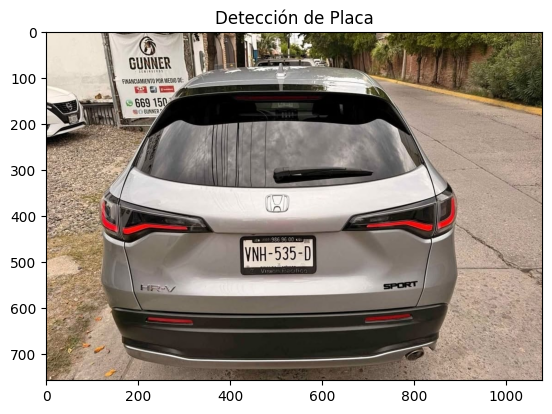


Resultados del OCR:
[([[np.int32(172), np.int32(47)], [np.int32(277), np.int32(47)], [np.int32(277), np.int32(92)], [np.int32(172), np.int32(92)]], 'CUNNER', np.float64(0.7336017172460264)), ([[np.int32(162), np.int32(99)], [np.int32(301), np.int32(99)], [np.int32(301), np.int32(119)], [np.int32(162), np.int32(119)]], 'FIAYCIAMIEMTO Por WEDHO dE:', np.float64(0.15863879288584537)), ([[np.int32(190), np.int32(140)], [np.int32(270), np.int32(140)], [np.int32(270), np.int32(172)], [np.int32(190), np.int32(172)]], '669 150', np.float64(0.9882561290553014)), ([[np.int32(210), np.int32(164)], [np.int32(256), np.int32(164)], [np.int32(256), np.int32(184)], [np.int32(210), np.int32(184)]], 'GuMMERZ', np.float64(0.06364413712366482)), ([[np.int32(487), np.int32(445)], [np.int32(543), np.int32(445)], [np.int32(543), np.int32(461)], [np.int32(487), np.int32(461)]], '986.96 00', np.float64(0.46001059929056604)), ([[np.int32(426), np.int32(458)], [np.int32(583), np.int32(458)], [np.int32(583), np.

In [3]:
# nombre del archivo de imagen
IMAGEN_PLACA = 'placa 1.jpg'

# leer la imagen
try:
    img = cv2.imread(IMAGEN_PLACA)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
except:
    print(f"ERROR: no se pudo cargar la imagen {IMAGEN_PLACA}. aseguate de que esté subida")
    # salir si la imagen no existe
    exit()

# realizar el reconocimiento
# colab lo ejecutará usando el modelo preentrenado de EasyOCR
resultados = reader.readtext(img_rgb)

# mostrar la imagen original con las detecciones
plt.imshow(img_rgb)
plt.title("Detección de Placa")
plt.show()

print("\nResultados del OCR:")
print(resultados)

In [4]:
def limpiar_placa(texto):
    """limpia el texto detectado para que solo queden caracteres válidos para la placa"""
    # se permiten letras, números y se normalizan guiones/espacios
    texto_limpio = ''.join(filter(str.isalnum, texto)).upper()

    return texto_limpio

# buscamos el resultado que parece una placa (el texto detectado con mayor confianza)
placa_detectada_final = "NO DETECTADA"

# iterar sobre los resultados para encontrar el texto más confiable/grande
if resultados:
    # EasyOCR devuelve [bounding_box, texto, confianza]

    # suponemos que el texto con mayor área de bounding box es la placa
    mayor_area = 0
    mejor_texto = ""

    for (bbox, texto, confianza) in resultados:
        # bbox es [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
        # se calcula un área aproximada (ancho * alto) para la caja
        ancho = abs(bbox[1][0] - bbox[0][0])
        alto = abs(bbox[2][1] - bbox[0][1])
        area = ancho * alto

        # heurística: si el texto es de longitud razonable (6 a 9 caracteres) y es el más grande:
        if area > mayor_area and 6 <= len(limpiar_placa(texto)) <= 9:
            mayor_area = area
            mejor_texto = limpiar_placa(texto)

    if mejor_texto:
        placa_detectada_final = mejor_texto
        print(f"placa extraída (limpia): {placa_detectada_final}")
    else:
        print("placa no pudo ser identificada con la heurística")

else:
    print("EasyOCR no detectó ningún texto en la imagen")

print(f"\nresultado final listo para el sistema de vinculación: {placa_detectada_final}")

placa extraída (limpia): VNH535D

resultado final listo para el sistema de vinculación: VNH535D
